# Problem 3. Model Training

## Preparation

In [17]:
37695/2430981

0.015506085814738987

In [3]:
import numpy as np
import pandas as pd
Train_df = pd.read_csv('/Users/weisihan/Downloads/we_data/train_newfeature.csv')
"""Valid_df = pd.read_csv('/Users/weisihan/Downloads/we_data/valid_newfeature.csv')"""

"Valid_df = pd.read_csv('/Users/weisihan/Downloads/we_data/valid_newfeature.csv')"

In [69]:
Train_dff = pd.read_csv('/Users/weisihan/Downloads/we_data/mytrainingset.csv')

In [2]:
Train_df.shape
#(2430981, 127)
#Train_dff.shape

(2430981, 127)

In [3]:
"""# bids which click =1
df1 = Train_df[Train_df['click']==1]
# bids which click =0
df0 = Train_df[Train_df['click']==0]
# get 10% of click =0 data, down sampling
df2=df0.sample(frac=0.1)
# combine 10% of click =0 data and all click=1, down sampling
combined_df = pd.concat([df1, df2],axis=0)
combined_df.head()
combined_df.shape
#(244712, 127)"""

In [70]:
cols=list(Train_df.columns)[1:]

In [4]:
train_y = Train_df['click']
train_x = Train_df[cols]

In [71]:
"""train_y1 = Train_dff['click']
train_x1 = Train_dff[cols]"""

In [ ]:
#++++++++++++++++++++++++++(其实最后也没用这个，作为参考吧）

这里面主要是说的一般调booster参数的思路

step1：设置一些初始值。

step2：保持learning rate和其他booster相关的参数不变，调节和estimators的参数。、

step3：保证estimator和其他的booster参数不变，调节learning rate

step4：保持estimator和learning rate不变，调节booste相关的参数。可以从影响最大的max_depth 和min_child_weight开始。逐步调节所有可能有影响的booster参数

step5: 缩小learning rate，得到最佳的learning rate值

step6：得到一组效果还不错的参数组合

In [76]:
#++++++++++++++++++++++++++

In [72]:
import xgboost

xgb = xgboost.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=6,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.01,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb4, train, predictors)

In [6]:
#train xgboost model
import xgboost
X = train_x
y = train_y
# train the default model
#model = xgboost.XGBClassifier()
model = xgb
model.fit(X, y)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=7, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [75]:
from sklearn.externals import joblib

filename = 'Simple_XGBoost_model.sav'
joblib.dump(model1, filename)

['Simple_XGBoost_model.sav']

In [73]:
"""#train xgboost model
import xgboost
X1 = train_x1
y1 = train_y1
# train the default model
#model = xgboost.XGBClassifier()
model1 = xgb
model1.fit(X1, y1)

"""

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=7, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [8]:
#test the default model
test_x = Valid_df[cols]
test_predictions = model.predict_proba(test_x)
test_predictions_class = model.predict(test_x)

In [37]:
"""#test the default model
test_x1 = Valid_df[cols]
test_predictions1 = model1.predict_proba(test_x1)
test_predictions_class1 = model1.predict(test_x1)"""

In [9]:
test_predictions[:,1]

array([ 0.0002214 ,  0.00017558,  0.00019471, ...,  0.00123284,
        0.00043474,  0.00031074], dtype=float32)

In [10]:
test_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result['click']= Valid_df['click'].copy()
test_result['click_pred_per'] = test_predictions[:,1]
test_result['click_pred_class'] = test_predictions_class
test_result.head()

,click,click_pred_per,click_pred_class
0,0,0.000221,0
1,0,0.000176,0
2,0,0.000195,0
3,0,0.000191,0
4,0,0.000195,0


In [93]:
test_result.to_csv('test_result_vali.csv', encoding='utf-8', index=False)

In [95]:
test_result.shape

(303925, 3)

In [38]:
"""test_result1 = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result1['click']= Valid_df['click'].copy()
test_result1['click_pred_per'] = test_predictions1[:,1]
test_result1['click_pred_class'] = test_predictions_class1
test_result1.head()"""

,click,click_pred_per,click_pred_class
0,0,0.001982,0
1,0,0.001269,0
2,0,0.001264,0
3,0,0.001402,0
4,0,0.001109,0


In [12]:
"""def judge_fomular(pCTR, click):
    if pCTR > 0.5:
        return 1
    else:
        return 0"""

'def judge_fomular(pCTR, click):\n    if pCTR > 0.5:\n        return 1\n    else:\n        return 0'

In [13]:
#test_result['click_pred_class'] = test_result.apply(lambda row: judge_fomular(row['click_pred_per'], row['click']), axis=1)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = test_result['click']
y_pred_class = test_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))



[[303717      6]
 [   176     26]]
TP: 26
TN: 303717
FP: 6
FN: 176
Accuracy: 99.940117%
Recall: 12.871287%
Specificity: 99.998025%
False Positive Rate: 0.001975%
Precision: 81.250000%
F1 score: 22.222222%


In [48]:
"""from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


y_test1 = test_result1['click']
y_pred_class1 = test_result1['click_pred_class']

print(confusion_matrix(y_test1, y_pred_class1))

confusion1 = confusion_matrix(y_test1, y_pred_class1)
TP1 = confusion1[1, 1]
TN1 = confusion1[0, 0]
FP1 = confusion1[0, 1]
FN1 = confusion1[1, 0]
print ("TP:", TP1)
print ("TN:", TN1)
print ("FP:", FP1)
print ("FN:", FN1)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test1, y_pred_class1)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (recall_score(y_test1, y_pred_class1)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN1 / float(TN1+FP1)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity1 = TN1 / float(TN1+FP1)
print ("False Positive Rate: %.6f%%" %((1 - specificity1)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision1 = precision_score(y_test1, y_pred_class1)
print ("Precision: %.6f%%" %(precision1*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f11 = f1_score(y_test1, y_pred_class1)
print ("F1 score: %.6f%%" %(f11*100.0))


"""

[[303602    121]
 [   141     61]]
TP: 61
TN: 303602
FP: 121
FN: 141
Accuracy: 99.913795%
Recall: 30.198020%
Specificity: 99.960161%
False Positive Rate: 0.039839%
Precision: 33.516484%
F1 score: 31.770833%


In [12]:
test_result.head()

,click,click_pred_per,click_pred_class
0,0,0.000221,0
1,0,0.000176,0
2,0,0.000195,0
3,0,0.000191,0
4,0,0.000195,0


In [13]:


# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt


# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC_curve(data, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(data, prediction)
    roc_auc = roc_auc_score(data, prediction)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC curve for CTR')
    plt.grid(True)
    plt.legend(loc="lower right")
    
    return




the AUC for XGBoost is: 0.885329


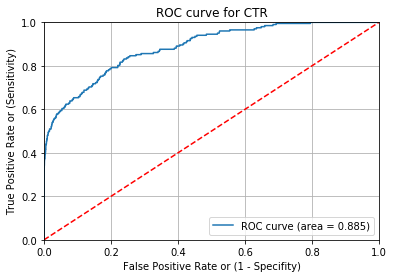

In [14]:
plot_ROC_curve(test_result['click'], test_result['click_pred_per'])
#xgboost的auc
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))

the AUC for XGBoost is: 0.893034


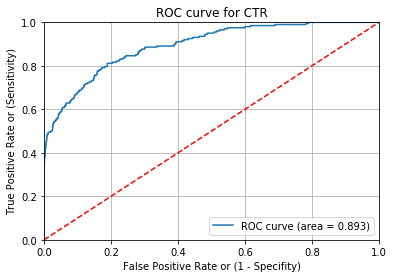

In [41]:
"""plot_ROC_curve(test_result1['click'], test_result1['click_pred_per'])
#xgboost的auc
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result1['click'], test_result1['click_pred_per'])))"""

In [18]:
tmp = test_result[test_result['click']==1].copy()

In [19]:
tmp=tmp[tmp['click_pred_per']>0]

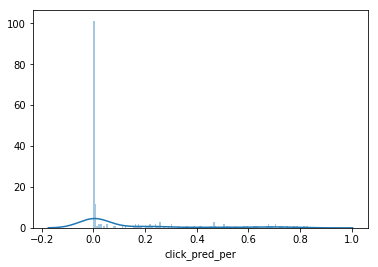

In [20]:
import seaborn as sns 
sns.distplot(tmp['click_pred_per'], bins=150)
#sns.distplot(tmp['click_pred_per'], kde_kws={"shade": True})

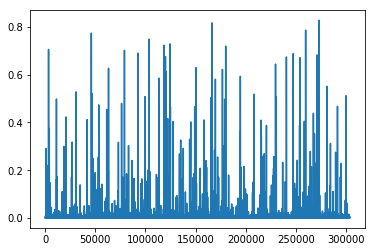

In [21]:
plt.plot(test_result['click_pred_per'])

## QR's Code

In [85]:
df_valid = pd.read_csv("/Users/weisihan/Downloads/we_data/validation.csv")

In [84]:
# parameters
total_budget = 6250000
payprice = df_valid['payprice'].as_matrix()
Train_df_qr = df_valid.copy()
test_predictions=test_result['click_pred_per']
#test_predictions1=test_result['click_pred_per']

avgCTR = 1793/2430981 #train set
#tuning...

In [59]:
len(payprice)

303925

In [60]:
Train_df_qr

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3.0,...,90,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111"
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1.0,...,280,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110"
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1.0,...,250,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2.0,...,280,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110"
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3.0,...,90,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111"


In [61]:
def generate_bidprice(base_bid, test_predictions):
    avgCTR = 1793/2430981#train set
    bidprices = base_bid*test_predictions/avgCTR
    return bidprices

In [62]:
def Prob3(Train_df,payprice,base_bid,test_predictions):
    Train_Const_summ = pd.DataFrame({'Clicks':'', 'Spend':'', 'CTR':'', 'CPM':'', 'eCPC':''}, index=[0])
    
    current_budget = total_budget
    Train_df['win'] = 0 #initialize win label
    bidprices = generate_bidprice(base_bid, test_predictions)
    #start biding...
    for i in Train_df.index:
    #for i in range(Train_df.shape[0]):
        if current_budget >= bidprices[i]:
            #generate bidprice:
            current_bidprice = bidprices[i]

            #Winning criterion:
            current_payprice = payprice[i]
            if current_bidprice > current_payprice:
                Train_df.at[i, 'win'] = int(1)
                current_budget = current_budget - current_payprice
            else:
                Train_df.at[i, 'win'] = int(0)
        else:
            print('lack of budget!',current_budget)
            break
    #biding end        
    
    Train_df_new = Train_df[Train_df['win']!=0]
    #wintimes,_ = Train_df_new.shape
    #print('wintimes:',wintimes)
    #print('current_budget',current_budget)

    Clk = Train_df_new['click'].sum()
    Imp = Train_df_new['click'].count()
    CTR = Clk/Imp
    Spd = total_budget - current_budget
    CPM = 1000*Spd/Imp
    eCPC = Spd/Clk
    
    Train_Const_summ.loc[0,'Clicks']=Clk
    Train_Const_summ.loc[0,'Spend']=Spd
    Train_Const_summ.loc[0,'CTR']=CTR
    Train_Const_summ.loc[0,'CPM']=CPM
    Train_Const_summ.loc[0,'eCPC']=eCPC

    print(Train_Const_summ)
    
        
    return Train_df,current_budget

In [63]:
#Train_df,current_budget = Prob3(Train_df_qr,payprice,base_bid,test_predictions)

In [64]:
def calculate_click(base_bid,Train_df,payprice,test_predictions):
    print('base_bid:',base_bid)
    result_df,current_budget = Prob3(Train_df,payprice,base_bid,test_predictions)
    print('current_budget:',current_budget)
    Train_df_new = result_df[result_df['win']!=0]
    wintimes,_ = Train_df_new.shape
    print('wintimes:',wintimes)
    print('----------------')
    Clk = Train_df_new['click'].sum()    
    return Clk

In [65]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mpld3
import numpy as np

In [66]:
base_bids = np.arange(10,200,10)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 10
     CPM         CTR Clicks   Spend     eCPC
0  21645  0.00942761     84  192857  2295.92
current_budget: 6057143
wintimes: 8910
----------------
base_bid: 20
       CPM         CTR Clicks   Spend     eCPC
0  23848.5  0.00468196     99  504277  5093.71
current_budget: 5745723
wintimes: 21145
----------------
base_bid: 30
       CPM        CTR Clicks   Spend     eCPC
0  26403.6  0.0035014    115  867199  7540.86
current_budget: 5382801
wintimes: 32844
----------------
base_bid: 40
       CPM         CTR Clicks    Spend     eCPC
0  28342.8  0.00267181    126  1336620  10608.1
current_budget: 4913380
wintimes: 47159
----------------
base_bid: 50
       CPM         CTR Clicks    Spend     eCPC
0  30115.6  0.00210174    132  1891410  14328.9
current_budget: 4358590
wintimes: 62805
----------------
base_bid: 60
       CPM         CTR Clicks    Spend     eCPC
0  32324.3  0.00177289    136  2479626  18232.5
current_budget: 3770374
wintimes: 76711
----------------
base_bid: 70
    

In [33]:
base_bids = np.arange(105,120,1)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 105
       CPM         CTR Clicks    Spend     eCPC
0  40893.9  0.00122812    159  5294371  33297.9
current_budget: 955629
wintimes: 129466
----------------
base_bid: 106
       CPM         CTR Clicks    Spend     eCPC
0  41077.8  0.00121841    159  5360569  33714.3
current_budget: 889431
wintimes: 130498
----------------
base_bid: 107
       CPM         CTR Clicks    Spend   eCPC
0  41245.2  0.00121689    160  5423044  33894
current_budget: 826956
wintimes: 131483
----------------
base_bid: 108
       CPM         CTR Clicks    Spend     eCPC
0  41391.9  0.00120846    160  5480286  34251.8
current_budget: 769714
wintimes: 132400
----------------
base_bid: 109
       CPM        CTR Clicks    Spend   eCPC
0  41559.7  0.0011991    160  5545437  34659
current_budget: 704563
wintimes: 133433
----------------
base_bid: 110
       CPM         CTR Clicks    Spend     eCPC
0  41719.8  0.00121262    163  5607976  34404.8
current_budget: 642024
wintimes: 134420
----------------
base_bid

In [34]:
base_bids = np.arange(120,125,1)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)

base_bid: 120
lack of budget! 82535
       CPM         CTR Clicks    Spend     eCPC
0  43332.2  0.00112415    160  6167465  38546.7
current_budget: 82535
wintimes: 142330
----------------
base_bid: 121
lack of budget! 21993
       CPM         CTR Clicks    Spend   eCPC
0  43477.7  0.00111696    160  6228007  38925
current_budget: 21993
wintimes: 143246
----------------
base_bid: 122
lack of budget! 44
       CPM         CTR Clicks    Spend     eCPC
0  43633.4  0.00111004    159  6249956  39307.9
current_budget: 44
wintimes: 143238
----------------
base_bid: 123
lack of budget! 18873
       CPM         CTR Clicks    Spend     eCPC
0  43790.2  0.00108929    155  6231127  40200.8
current_budget: 18873
wintimes: 142295
----------------
base_bid: 124
lack of budget! 21948
       CPM         CTR Clicks    Spend     eCPC
0  43922.6  0.00108607    154  6228052  40441.9
current_budget: 21948
wintimes: 141796
----------------
160


In [30]:
#原来的
"""base_bids = np.arange(5,20,1)
Clks = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions) for base_bid in base_bids]
fig = plt.figure()
print(max(Clks))
plt.plot(base_bids,Clks)
mpld3.display(fig)"""

base_bid: 5
       CPM         CTR Clicks    Spend     eCPC
0  32615.7  0.00242286    132  1776935  13461.6
current_budget: 4473065
wintimes: 54481
----------------
base_bid: 6
     CPM         CTR Clicks    Spend     eCPC
0  34771  0.00203261    138  2360706  17106.6
current_budget: 3889294
wintimes: 67893
----------------
base_bid: 7
       CPM         CTR Clicks    Spend     eCPC
0  36612.1  0.00178449    143  2933914  20516.9
current_budget: 3316086
wintimes: 80135
----------------
base_bid: 8
       CPM         CTR Clicks    Spend     eCPC
0  38284.4  0.00163731    149  3483998  23382.5
current_budget: 2766002
wintimes: 91003
----------------
base_bid: 9
       CPM         CTR Clicks    Spend     eCPC
0  39845.5  0.00151154    153  4033204  26360.8
current_budget: 2216796
wintimes: 101221
----------------
base_bid: 10
       CPM         CTR Clicks    Spend     eCPC
0  41295.8  0.00141559    157  4580040  29172.2
current_budget: 1669960
wintimes: 110908
----------------
base_bid: 1

In [44]:
base_bids1 = np.arange(10,120,10)
Clks1 = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions1) for base_bid in base_bids1]
fig1 = plt.figure()
print(max(Clks1))
plt.plot(base_bids1,Clks1)
mpld3.display(fig1)

base_bid: 10
       CPM         CTR Clicks    Spend     eCPC
0  41295.8  0.00141559    157  4580040  29172.2
current_budget: 1669960
wintimes: 110908
----------------
base_bid: 20
lack of budget! 9495
       CPM          CTR Clicks    Spend     eCPC
0  52748.4  0.000972047    115  6240505  54265.3
current_budget: 9495
wintimes: 118307
----------------
base_bid: 30
lack of budget! 6994
       CPM          CTR Clicks    Spend     eCPC
0  60282.8  0.000811108     84  6243006  74321.5
current_budget: 6994
wintimes: 103562
----------------
base_bid: 40
lack of budget! 1163
     CPM          CTR Clicks    Spend     eCPC
0  65262  0.000710183     68  6248837  91894.7
current_budget: 1163
wintimes: 95750
----------------
base_bid: 50
lack of budget! 799
       CPM          CTR Clicks    Spend     eCPC
0  68547.5  0.000691047     63  6249201  99193.7
current_budget: 799
wintimes: 91166
----------------
base_bid: 60
lack of budget! 7028
       CPM         CTR Clicks    Spend    eCPC
0  71093.1  

In [45]:
base_bids1 = np.arange(5,20,1)
Clks1 = [calculate_click(base_bid,Train_df_qr,payprice,test_predictions1) for base_bid in base_bids1]
fig1 = plt.figure()
print(max(Clks1))
plt.plot(base_bids1,Clks1)
mpld3.display(fig1)

base_bid: 5
       CPM         CTR Clicks    Spend     eCPC
0  32615.7  0.00242286    132  1776935  13461.6
current_budget: 4473065
wintimes: 54481
----------------
base_bid: 6
     CPM         CTR Clicks    Spend     eCPC
0  34771  0.00203261    138  2360706  17106.6
current_budget: 3889294
wintimes: 67893
----------------
base_bid: 7
       CPM         CTR Clicks    Spend     eCPC
0  36612.1  0.00178449    143  2933914  20516.9
current_budget: 3316086
wintimes: 80135
----------------
base_bid: 8
       CPM         CTR Clicks    Spend     eCPC
0  38284.4  0.00163731    149  3483998  23382.5
current_budget: 2766002
wintimes: 91003
----------------
base_bid: 9
       CPM         CTR Clicks    Spend     eCPC
0  39845.5  0.00151154    153  4033204  26360.8
current_budget: 2216796
wintimes: 101221
----------------
base_bid: 10
       CPM         CTR Clicks    Spend     eCPC
0  41295.8  0.00141559    157  4580040  29172.2
current_budget: 1669960
wintimes: 110908
----------------
base_bid: 1

In [ ]:
Summary
#for simple training set model, base bid is 13, clicks is 166, 97598 money left
#for 244 training set model, base bid is 110-119, clicks is 163, ....